In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.pipeline import Pipeline
from scipy import stats

import requests
import pickle
import joblib
import warnings
warnings.filterwarnings("ignore")


In [2]:

# shared link
shared_link = 'https://drive.google.com/file/d/1Fj5h8yyRkdDNDLdzMyKDgyRJ-BL3IxqX/view?usp=sharing'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Financial_Data.csv', 'wb') as f:
    f.write(response.content)
df=pd.read_csv('Financial_Data.csv')
df.head(20)

,Market,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1
5,BAC,9.124700e+10,0.0446,0.000000e+00,9.124700e+10,0.000000e+00,5.338100e+10,5.338100e+10,3.786600e+10,0.000000e+00,...,0.0680,0.0000,0.0321,0.0029,-0.0008,0.0000,-0.0249,Financial Services,44.315988,1
6,AAPL,2.655950e+11,0.1586,1.637560e+11,1.018390e+11,1.423600e+10,1.670500e+10,3.094100e+10,7.089800e+10,0.000000e+00,...,0.3734,-0.1852,-0.0256,-0.1584,-0.0103,0.2293,0.0946,Technology,88.742465,1
7,MSFT,1.103600e+11,0.1428,3.835300e+10,7.200700e+10,1.472600e+10,2.222300e+10,3.694900e+10,3.505800e+10,0.000000e+00,...,0.1806,0.2205,0.0341,-0.0512,-0.1066,0.1296,0.1144,Technology,58.259263,1
8,SIRI,5.770692e+09,0.0637,2.308606e+09,3.462086e+09,1.232190e+08,1.311199e+09,1.735138e+09,1.726948e+09,3.500730e+08,...,-0.0361,0.0892,-0.0188,-0.2371,0.0210,0.0960,0.0314,Consumer Cyclical,22.161943,1
9,HPQ,5.847200e+10,0.1233,4.780300e+10,1.066900e+10,1.404000e+09,4.859000e+09,6.605000e+09,4.064000e+09,1.051000e+09,...,0.1584,0.0477,0.0519,0.8039,-0.2343,0.1798,0.1104,Technology,3.016789,1


In [3]:

# Display basic information about the data
print("Dataset Shape:", df.shape)


Dataset Shape: (4392, 225)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Columns: 225 entries, Market to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 7.5+ MB


In [5]:
for dtype in ['int64', 'float64', 'object']:
  print(f"Columns with data type {dtype}:")
  print(df.select_dtypes(include=[dtype]).columns.tolist())

Columns with data type int64:
['Class']
Columns with data type float64:
['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses', 'Operating Income', 'Interest Expense', 'Earnings before Tax', 'Income Tax Expense', 'Net Income - Non-Controlling int', 'Net Income - Discontinued ops', 'Net Income', 'Preferred Dividends', 'Net Income Com', 'EPS', 'EPS Diluted', 'Weighted Average Shs Out', 'Weighted Average Shs Out (Dil)', 'Dividend per Share', 'Gross Margin', 'EBITDA Margin', 'EBIT Margin', 'Profit Margin', 'Free Cash Flow margin', 'EBITDA', 'EBIT', 'Consolidated Income', 'Earnings Before Tax Margin', 'Net Profit Margin', 'Cash and cash equivalents', 'Short-term investments', 'Cash and short-term investments', 'Receivables', 'Inventories', 'Total current assets', 'Property, Plant & Equipment Net', 'Goodwill and Intangible Assets', 'Long-term investments', 'Tax assets', 'Total non-current assets', 'Total assets', 'Payables', 'Sho

Descriptive statistics

In [6]:

# Descriptive statistics for numerical features
numerical_features = df.select_dtypes(include=['number']).columns
numerical_stats = df[numerical_features].describe()

# Descriptive statistics for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
categorical_stats = df[categorical_features].describe()


# You can also create a more visually appealing table using pandas styling
print("\nDescriptive Statistics (Styled Table):")
styled_numerical_stats = numerical_stats.style.set_caption("Numerical Features").set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '16px')]}
])
styled_categorical_stats = categorical_stats.style.set_caption("Categorical Features").set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '16px')]}
])
display(styled_numerical_stats)
display(styled_categorical_stats)



Descriptive Statistics (Styled Table):


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Op

,Market,Sector
count,4392,4392
unique,4392,11
top,CMCSA,Financial Services
freq,1,824


Number of null values for each column

In [7]:
import pandas as pd


# Calculate the number of null values for each column
null_counts = df.isnull().sum()

# Create a DataFrame from the null counts
null_counts_df = pd.DataFrame({'Column': null_counts.index, 'Null Count': null_counts.values})

# Transpose the DataFrame to have columns as the index
null_counts_df = null_counts_df.set_index('Column').transpose()


# Display the table in a horizontal format
print(null_counts_df.to_string(index=True))

Column      Market  Revenue  Revenue Growth  Cost of Revenue  Gross Profit  R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  Interest Expense  Earnings before Tax  Income Tax Expense  Net Income - Non-Controlling int  Net Income - Discontinued ops  Net Income  Preferred Dividends  Net Income Com  EPS  EPS Diluted  Weighted Average Shs Out  Weighted Average Shs Out (Dil)  Dividend per Share  Gross Margin  EBITDA Margin  EBIT Margin  Profit Margin  Free Cash Flow margin  EBITDA  EBIT  Consolidated Income  Earnings Before Tax Margin  Net Profit Margin  Cash and cash equivalents  Short-term investments  Cash and short-term investments  Receivables  Inventories  Total current assets  Property, Plant & Equipment Net  Goodwill and Intangible Assets  Long-term investments  Tax assets  Total non-current assets  Total assets  Payables  Short-term debt  Total current liabilities  Long-term debt  Total debt  Deferred revenue  Tax Liabilities  Deposit Liabilities  Total non-current

Remove columns with high missing percentages

In [8]:


# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Set a threshold for the maximum allowed missing percentage (e.g., 70%)
threshold = 50

# Identify columns with missing values exceeding the threshold
columns_to_remove = missing_percentage[missing_percentage > threshold].index.tolist()

print(f"Columns with missing values exceeding {threshold}%:")
print(columns_to_remove)


Columns with missing values exceeding 50%:
['operatingCycle', 'cashConversionCycle']


In [9]:
# Remove the identified columns from the DataFrame
df = df.drop(columns=columns_to_remove)

# Print the list of removed columns
print(f"Removed Columns: {columns_to_remove}")

Removed Columns: ['operatingCycle', 'cashConversionCycle']


Impute missing numerical values with median

In [10]:

# Create a SimpleImputer object with the median strategy
imputer = SimpleImputer(strategy='median')

# Select numerical columns with missing values
numerical_cols_with_missing = df.select_dtypes(include=['float64', 'int64']).columns[df.select_dtypes(include=['float64', 'int64']).isnull().any()]


# Fit and transform the imputer on the numerical columns with missing values
df[numerical_cols_with_missing] = imputer.fit_transform(df[numerical_cols_with_missing])


In [11]:
null_counts = df.isnull().sum()
null_counts_df = pd.DataFrame({'Column': null_counts.index, 'Null Count': null_counts.values})
null_counts_df = null_counts_df.set_index('Column').transpose()

print(null_counts_df.to_string(index=True))

Column      Market  Revenue  Revenue Growth  Cost of Revenue  Gross Profit  R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  Interest Expense  Earnings before Tax  Income Tax Expense  Net Income - Non-Controlling int  Net Income - Discontinued ops  Net Income  Preferred Dividends  Net Income Com  EPS  EPS Diluted  Weighted Average Shs Out  Weighted Average Shs Out (Dil)  Dividend per Share  Gross Margin  EBITDA Margin  EBIT Margin  Profit Margin  Free Cash Flow margin  EBITDA  EBIT  Consolidated Income  Earnings Before Tax Margin  Net Profit Margin  Cash and cash equivalents  Short-term investments  Cash and short-term investments  Receivables  Inventories  Total current assets  Property, Plant & Equipment Net  Goodwill and Intangible Assets  Long-term investments  Tax assets  Total non-current assets  Total assets  Payables  Short-term debt  Total current liabilities  Long-term debt  Total debt  Deferred revenue  Tax Liabilities  Deposit Liabilities  Total non-current

# **Financial Data Exploratory Data Analysis**

In [12]:
# Correlation Heatmap
plt.figure(figsize=(100,80))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True)
plt.title('Correlation Heatmap of Financial Metrics')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()
plt.close()


Output hidden; open in https://colab.research.google.com to view.

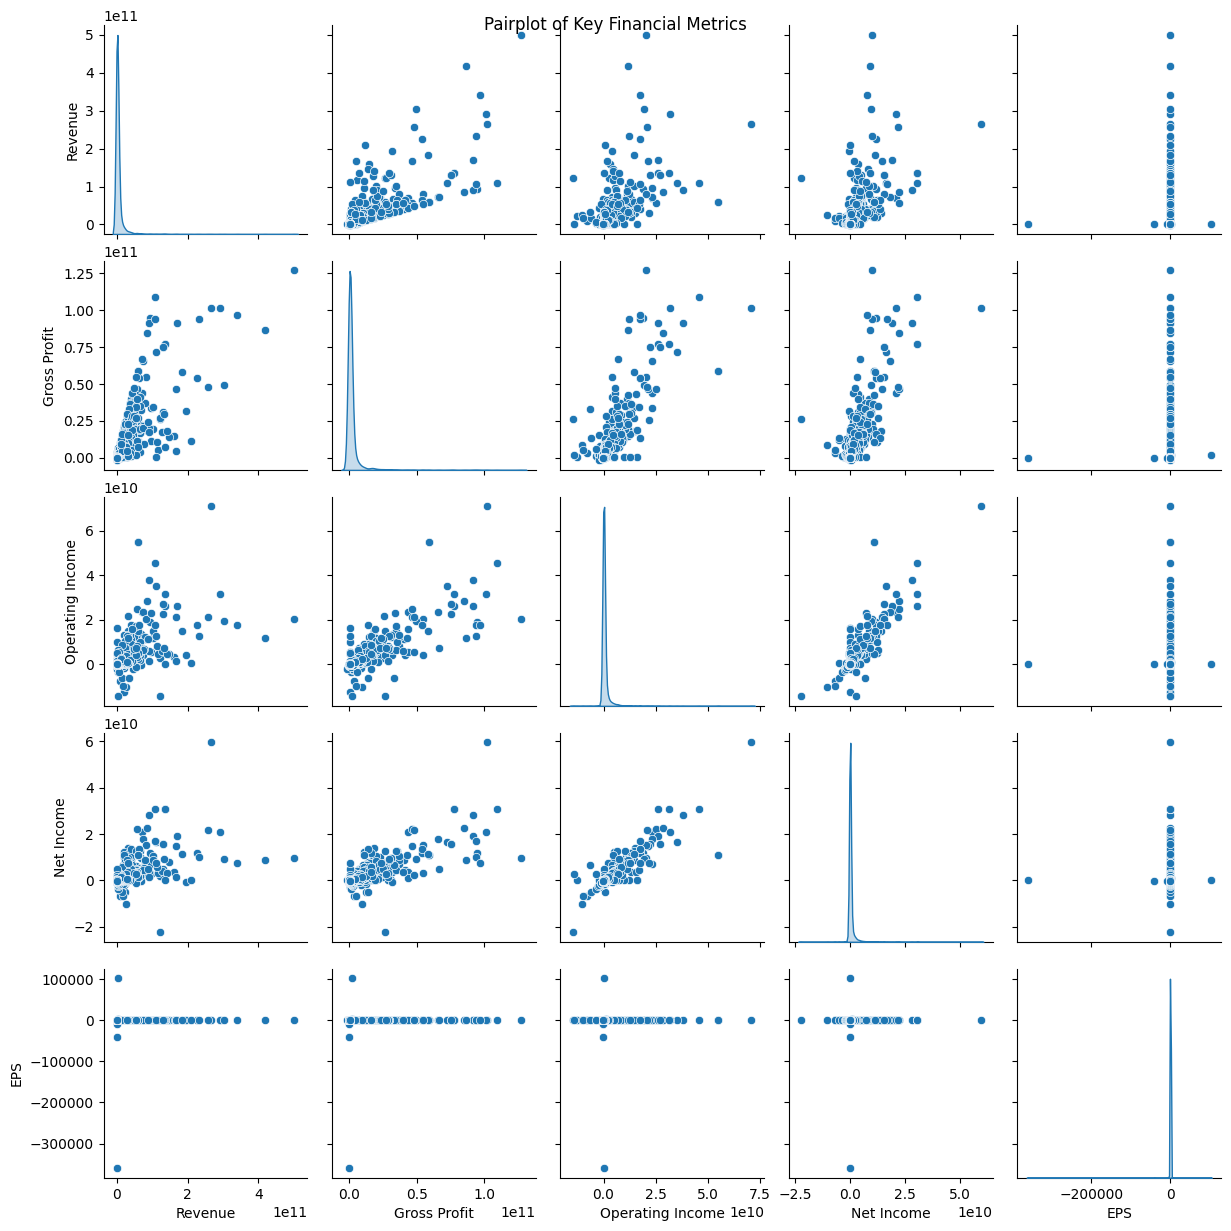

In [13]:

# Pairplot of key financial metrics
key_metrics = ['Revenue', 'Gross Profit', 'Operating Income', 'Net Income', 'EPS']
sns.pairplot(df[key_metrics], diag_kind='kde')
plt.suptitle('Pairplot of Key Financial Metrics')
plt.savefig('financial_metrics_pairplot.png')
plt.show()
plt.close()


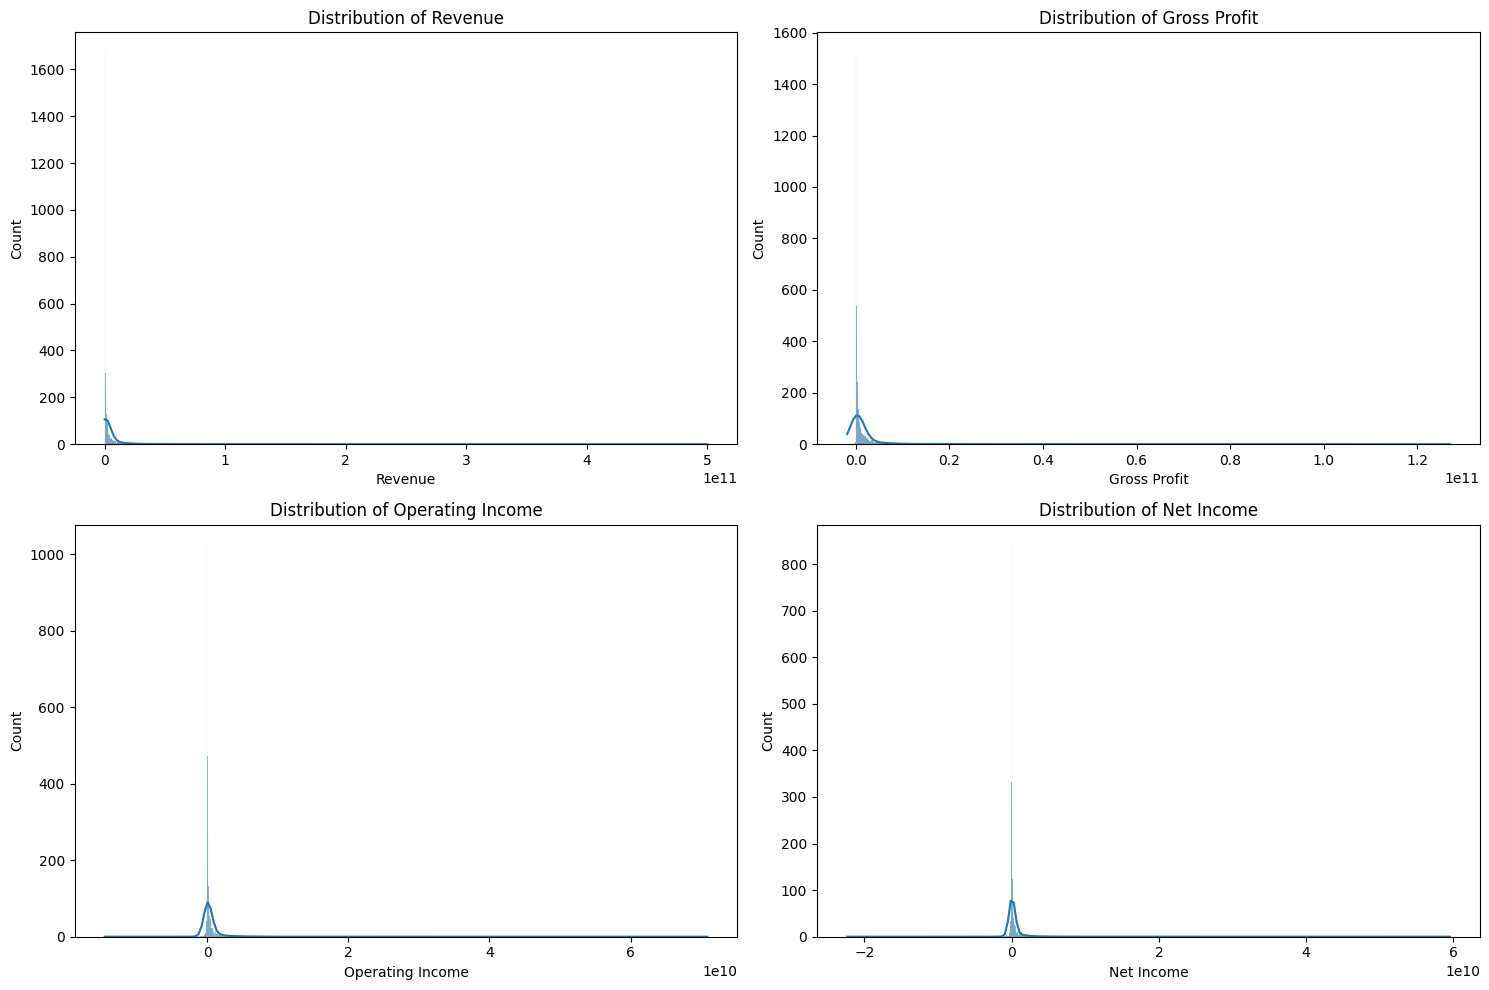

In [14]:

# Distribution of important financial metrics
fig, axes = plt.subplots(2, 2, figsize=(15,10))
metrics = ['Revenue', 'Gross Profit', 'Operating Income', 'Net Income']
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    sns.histplot(df[metric], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {metric}')
plt.tight_layout()
plt.savefig('financial_metrics_distribution.png')
plt.show()
plt.close()


In [15]:

# Print some basic statistical summaries
df[key_metrics].describe()

,Revenue,Gross Profit,Operating Income,Net Income,EPS
count,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4392.000000
mean,5.070889e+09,2.017404e+09,6.492430e+08,4.327587e+08,-68.892216
std,2.039284e+10,7.629303e+09,2.957984e+09,2.083343e+09,5676.215751
min,-6.894100e+07,-1.818220e+09,-1.455700e+10,-2.235500e+10,-359825.000000
25%,6.584545e+07,3.737700e+07,-5.199308e+06,-9.446438e+06,-0.370000
50%,4.982640e+08,2.219470e+08,4.203800e+07,2.365300e+07,0.690000
75%,2.424800e+09,9.550422e+08,2.790345e+08,1.789542e+08,2.280000
max,5.003430e+11,1.269470e+11,7.089800e+10,5.953100e+10,101641.000000


In [16]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Iterate through categorical columns and encode them
for col in categorical_cols:
  df[col] = label_encoder.fit_transform(df[col])

# Now your categorical features are encoded as numerical values
df.head()

,Market,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,875,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,2,32.794573,1
1,2224,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,4,40.588068,1
2,2061,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,9,30.295514,1
3,2646,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,9,64.213737,1
4,1651,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,7,44.757840,1


In [27]:
# Feature selection using correlation matrix
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Class'].sort_values(ascending=False)

# Select features with high correlation (positive or negative) with the target variable
threshold = 0.1  # Adjust the threshold as needed
selected_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()
selected_features.remove('Class')  # Remove the target variable itself

# Print the selected features
print("Selected Features based on Correlation:")
print(selected_features)


Selected Features based on Correlation:
['2019 PRICE VAR [%]', 'Dividend per Share', '10Y Operating CF Growth (per Share)', '10Y Net Income Growth (per Share)', '5Y Dividend per Share Growth (per Share)', '5Y Net Income Growth (per Share)', 'EBIT', '10Y Revenue Growth (per Share)', '10Y Shareholders Equity Growth (per Share)']


In [30]:
def select_features(df):
    # Columns to remove
    columns_to_remove = [
        'Class',  '2019 PRICE VAR [%]',  # Remove target from features

        # Remove other potentially leaky columns
        'Market Cap', 'Enterprise Value',
        'Weighted Average Shs Out', 'Weighted Average Shs Out (Dil)'
    ]

    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Features are numeric columns not in the removal list
    features = [col for col in numeric_cols if col not in columns_to_remove]

    return features





In [34]:
# Select features and target
features = select_features(df)
X = df[features]
y = df['Class']


# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the features
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # Use original column names for X_scaled

print(y.head())
X_scaled.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64


,Market,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector
0,-1.041518,4.386162,-0.016826,-0.204356,12.124323,-0.122982,17.793454,13.679531,6.207555,9.301998,...,0.906321,0.993829,-0.015334,-0.038007,-0.028622,-0.032327,-0.024394,-0.108248,-0.021877,-1.277503
1,0.022479,0.444967,-0.017240,0.288836,0.634284,-0.122982,-0.074849,0.309901,1.063263,4.915309,...,-0.620416,-1.232177,-0.015430,-0.058173,-0.038693,-0.044210,-0.026505,-0.108248,-0.337291,-0.526895
2,-0.106084,3.225868,-0.016736,1.630291,5.468959,14.794731,1.635997,3.513880,7.663780,-0.599771,...,0.314861,0.310372,-0.015359,-0.029525,-0.037508,-0.026956,-0.026515,-0.059426,-0.297696,1.349624
3,0.355323,1.241759,-0.014830,0.641540,2.080846,2.235345,-0.015864,0.279447,4.850057,0.663596,...,0.039807,-0.024418,-0.015247,-0.004887,-0.031982,0.072026,-0.028123,0.109319,-0.066743,1.349624
4,-0.429463,5.715604,-0.017258,6.255651,3.164030,-0.122982,4.796984,7.258838,-5.141331,13.397141,...,-0.614376,-1.160189,-0.015565,-0.101399,-0.043221,-0.128144,-0.027118,-0.108248,-0.144463,0.599016


In [35]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)


print("Preprocessing complete. Shape of training data:", X_train.shape)
print("Features used:", features)

Preprocessing complete. Shape of training data: (3513, 217)
Features used: ['Market', 'Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses', 'Operating Income', 'Interest Expense', 'Earnings before Tax', 'Income Tax Expense', 'Net Income - Non-Controlling int', 'Net Income - Discontinued ops', 'Net Income', 'Preferred Dividends', 'Net Income Com', 'EPS', 'EPS Diluted', 'Dividend per Share', 'Gross Margin', 'EBITDA Margin', 'EBIT Margin', 'Profit Margin', 'Free Cash Flow margin', 'EBITDA', 'EBIT', 'Consolidated Income', 'Earnings Before Tax Margin', 'Net Profit Margin', 'Cash and cash equivalents', 'Short-term investments', 'Cash and short-term investments', 'Receivables', 'Inventories', 'Total current assets', 'Property, Plant & Equipment Net', 'Goodwill and Intangible Assets', 'Long-term investments', 'Tax assets', 'Total non-current assets', 'Total assets', 'Payables', 'Short-term debt', 'Total current liabilities', 'Long

In [39]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    cv=5,                                 # 5-fold cross-validation
    scoring='accuracy',                   # Use accuracy as the evaluation metric
    n_jobs=-1                             # Use all available CPU cores
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Train the best model
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

Accuracy: 0.745164960182025

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.39      0.49       273
           1       0.77      0.90      0.83       606

    accuracy                           0.75       879
   macro avg       0.71      0.65      0.66       879
weighted avg       0.73      0.75      0.72       879


Confusion Matrix:
[[107 166]
 [ 58 548]]


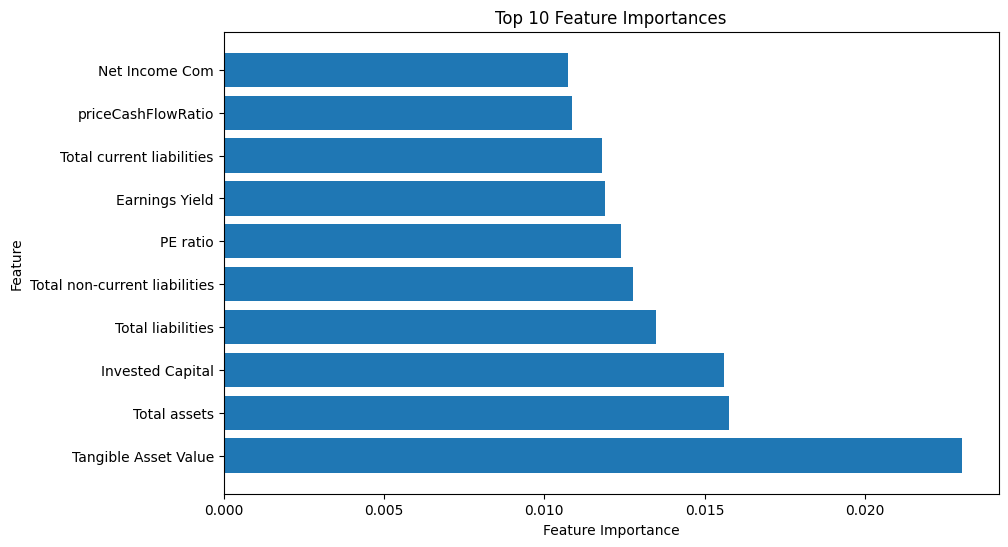

In [40]:


import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Select the top N features (e.g., top 10)
top_n_features = 10
top_features = feature_importance_df.head(top_n_features)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n_features} Feature Importances')
plt.show()